# TD Solar Impulse & Sky Sailor


## Summary :
* [1. Preliminary study ](#1) 

    * [1.1. Bond between power and mass of the plane](#1.1)
    
        * [1.1.1. Forces diagram ](#1.1.1) 
        * [1.1.2. Driving power definition](#1.1.2) 
        * [1.1.3. Minimum driving power ](#1.1.3) 
        * [1.1.4. Energy needed to travel a distance D ](#1.1.4) 
        
    * [1.2. Bond between power and surface of the wings](#1.2)
        * [1.2.1. Power flux density of solar radiation ](#1.2.1) 
        * [1.2.2. Overall efficiency ](#1.2.2) 
        * [1.2.3. Larger or smaller aircraft ? ](#1.2.3) 
        
    * [1.3. Photovoltaic cells](#1.3)
        * [1.3.1. Wavelength ](#1.3.1) 
        * [1.3.2. Assessment of the current produced ](#1.3.2) 
        * [1.3.3. Energy efficiency ](#1.3.3) 
        
* [2. Solar Impulse, day or night flight ](#2) 


In [1]:
from math import *
from IPython.display import Image
from IPython.core.display import HTML 

We start setting the values according to both airplanes: Solar Impulse & Sky Sailor.

The values are given in the following table :

| Aircraft | mass_aircraft with batteries (kg) | batteries mass(kg) | span(m) | wing surface($m^2$) | drag coefficient | lift coefficient | number of motor | maximum power per motor(W) |
| --- | --- | --- | --- | --- | --- | --- | --- | --- |
| Solar Impulse | 1600 | 400 | 61 | 200 | 0.012 | 0.6 | 4 | 6000 |
| Sky Sailor | 2.6 | 1.05 | 3.2 | 0.8 | 0.013 | 0.8 | 1 | 100 |

The format of the values will be a list of couples: 

L_values = [mass_aircraft, batteries mass, span, wing surface, drag coefficient, lift coefficient, number of motor, maximum power per motor(W)]

Where mass_aircraft = (mass Solar Impulse , mass Sky Sailor)


In [2]:
L_values = [(1600,2.6),(400,1.05),(61,3.2),(200,0.8),(0.012,0.013),(0.6,0.8),(4,1),(6000,100)]

M_SI,M_SS = L_values[0][0],L_values[0][1]
Batt_mass_SI,Batt_mass_SS = L_values[1][0],L_values[1][1]
Span_SI,Span_SS = L_values[2][0],L_values[2][1]
S_SI,S_SS = L_values[3][0],L_values[3][1]
CD_SI,CD_SS = L_values[4][0],L_values[4][1]
CL_SI,CL_SS = L_values[5][0],L_values[5][1]
N_motor_SI,N_motor_SS = L_values[6][0],L_values[6][1]
P_motor_SI,P_motor_SS = L_values[7][0],L_values[7][1]

The lift is defined by the following formula : 

$\Large L=\frac{1}{2} \rho S C_L V^2$

In [3]:
def lift(rho,S,CL,V):
    return(0.5*rho*S*CL*V**2)

The drag is defined by the following formula : 

$\Large L=\frac{1}{2} \rho S C_D V^2$

In [4]:
def drag(rho,S,CD,V):
    return(0.5*rho*S*CD*V**2)

# 1. Preliminary study <a class="anchor" id="1"></a>

>## 1.1. Bond between power and mass of the plane <a class="anchor" id="1.1"></a>

>>### 1.1.1 Forces diagram exerted on the plane <a class="anchor" id="1.1.1"></a>

In [5]:
Image(url= "https://www.grc.nasa.gov/www/k-12/airplane/Images/forces.jpg")

At constant velocity, the thrust is superior to drag, and the weight is equal to lift.

>>### 1.1.2 Driving power definition <a class="anchor" id="1.1.2"></a>

$ \Large P_m = \frac{1}{f} \sqrt {\frac{2g^3}{\rho C_L}} \cdot \frac {M^{3/2}}{S^{1/2}}$, with $\Large f=\frac{C_L}{C_D}$

In [6]:
def driving_power_1(g,rho):
    tot=CD_SI/CL_SI
    tot*=sqrt(2*g**3/(rho*CL_SI))*(M_SI**(3/2))/(S_SI**(0.5))
    return(tot)

def driving_power_2(g,rho):
    tot=CD_SS/CL_SS
    tot*=sqrt(2*g**3/(rho*CL_SS))*(M_SS**(3/2))/(S_SS**(0.5))
    return(tot)

>>### 1.1.3 Minimum driving power <a class="anchor" id="1.1.3"></a>

In [11]:
dp_SI = driving_power_1(9.8,1.2)
dp_SS = driving_power_2(3.7,0.015)
print("Driving power for Solar Impulse :",dp_SI,"W")
print("Driving power for Sky Sailor :",dp_SS,"W")

Driving power for Solar Impulse : 4627.887946401085 W
Driving power for Sky Sailor : 6.998345103673023 W


>>### 1.1.4 Energy needed to travel a distance D <a class="anchor" id="1.1.4"></a>

>## 1.2 Bond between power and surface of the wings <a class="anchor" id="1.2"></a>
>>### 1.2.1 Power flux density of solar radiation <a class="anchor" id="1.2.1"></a>

Let's consider that the power flux density is a sinus between 6 and 21.

We need to determine $\omega$ and $\phi$ in $sin(\omega t + \phi)$

$\omega = \frac{2 \pi}{T}$, and $T = 2*(20.75-6.25 = 2*14.5$ so : 

$\omega = \frac{\pi}{14.5}$

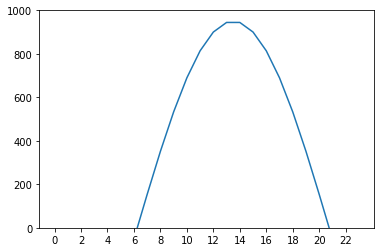

In [8]:
def f(t):
    t0 = 6.25
    w = pi/14.5
    phi = -w*t0
    amplitude = 950
    return(amplitude * sin(w*t+phi))
X=[i for i in range(24)]
Y=[f(e) for e in X]

from matplotlib import pyplot as plt
import numpy as np
plt.ylim(0,1000)
plt.plot(X,Y)
plt.xticks(np.arange(min(X), max(X)+1, 2.0))
plt.show()

We finally can evaluate the power flux density by integrating.

$$\int 950*sin(\omega t+\phi) \, dx = \frac{-950}{\omega}*cos(\omega t+\phi) +C$$
$$=\frac{-13775}{\pi}*cos(\omega t+\phi) +C$$

Now, we need to define the two borders of integration : 6.25 and 20.75
Then we have :

$$ I =\left[\frac{-13775}{\pi}*cos(\omega t+\phi)\right]^{20.75}_{6.25} $$

Finally :

$$ I =\left[\frac{-13775}{\pi}*cos(\frac{\pi}{14.5} t-\frac{6.25*\pi}{14.5})\right]^{20.75}_{6.25} $$

In [9]:
I = -(13775/pi)*cos((pi*20.75/14.5)-6.25*pi/14.5)
I-= -(13775/pi)*cos((pi*6.25/14.5)-6.25*pi/14.5)
print("The evaluated power flux density of the solar radiation is approximately equal to : ",round(I,0),"W/m^2")

The evaluated power flux density of the solar radiation is approximately equal to :  8769.0 W/m^2


## Driving power and characteristic size of the aircraft

We need to find one characteristic size of the aircraft for which the following two rules apply :

$$\Large P_m = a * size^\frac{7}{2}      ;      I = b * size^2$$

We need to plot $\frac {P_m}{size^\frac{7}{2}}$ and $\frac {I}{size^2}$ for different values of the sizes.

Let's consider that the aircraft span is such a size.

In [10]:
#Solar Impulse
a1=dp_SI/Span_SI**(7/2)
b1=I/(Span_SI)**(2)

#Sky Sailor
a2=dp_SS/Span_SS**(7/2)
b2=I/Span_SS**(2)


>>### 1.2.2 Overall efficiency <a class="anchor" id="1.2.2"></a>

>>### 1.2.3 Larger or smaller aircraft ? <a class="anchor" id="1.2.3"></a>

>## 1.3. Photovoltaic cells <a class="anchor" id="1.3"></a>
>>### 1.3.1. Wavelength <a class="anchor" id="1.3.1"></a>


>>### 1.3.2. Assessment of the current produced <a class="anchor" id="1.3.2"></a>


>>### 1.3.3. Energy efficiency <a class="anchor" id="1.3.3"></a>
        


# 2. Solar Impulse, day or night flight <a class="anchor" id="2"></a>